In [18]:
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")

plt.style.use("fivethirtyeight")
sns.set_style({'font.sans-serif': ['SimHei', 'Arial']})
%matplotlib inline

In [19]:
lianjia_df = pd.read_csv('./Data/lianjia.csv')

## 数据加载

In [20]:
display(lianjia_df.head(n=5))

,Direction,District,Elevator,Floor,Garden,Id,Layout,Price,Region,Renovation,Size,Year
0,东西,灯市口,NaN,6,锡拉胡同21号院,101102647043,3室1厅,780.0,东城,精装,75.0,1988
1,南北,东单,无电梯,6,东华门大街,101102650978,2室1厅,705.0,东城,精装,60.0,1988
2,南西,崇文门,有电梯,16,新世界中心,101102672743,3室1厅,1400.0,东城,其他,210.0,1996
3,南,崇文门,NaN,7,兴隆都市馨园,101102577410,1室1厅,420.0,东城,精装,39.0,2004
4,南,陶然亭,有电梯,19,中海紫御公馆,101102574696,2室2厅,998.0,东城,精装,90.0,2010


In [21]:
lianjia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23677 entries, 0 to 23676
Data columns (total 12 columns):
Direction     23677 non-null object
District      23677 non-null object
Elevator      15440 non-null object
Floor         23677 non-null int64
Garden        23677 non-null object
Id            23677 non-null int64
Layout        23677 non-null object
Price         23677 non-null float64
Region        23677 non-null object
Renovation    23677 non-null object
Size          23677 non-null float64
Year          23677 non-null int64
dtypes: float64(2), int64(3), object(7)
memory usage: 2.2+ MB


In [22]:
lianjia_df.describe()

,Floor,Id,Price,Size,Year
count,23677.000000,2.367700e+04,23677.000000,23677.000000,23677.000000
mean,12.765088,1.011024e+11,610.668319,99.149301,2001.326519
std,7.643932,5.652477e+05,411.452107,50.988838,9.001996
min,1.000000,1.010886e+11,60.000000,2.000000,1950.000000
25%,6.000000,1.011022e+11,365.000000,66.000000,1997.000000
50%,11.000000,1.011025e+11,499.000000,88.000000,2003.000000
75%,18.000000,1.011027e+11,717.000000,118.000000,2007.000000
max,57.000000,1.011028e+11,6000.000000,1019.000000,2017.000000


In [23]:
df = lianjia_df.copy()

# 增加每平方米价格
df['PerPrice'] = lianjia_df['Price']/lianjia_df['Size']

# 重新调整列位置
columns = ['Region', 'District', 'Garden', 'Layout', 'Floor', 'Year',
           'Size', 'Elevator', 'Direction', 'Renovation', 'PerPrice', 'Price']
df = pd.DataFrame(df, columns=columns)
display(df.head(n=2))

,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,PerPrice,Price
0,东城,灯市口,锡拉胡同21号院,3室1厅,6,1988,75.0,NaN,东西,精装,10.40,780.0
1,东城,东单,东华门大街,2室1厅,6,1988,60.0,无电梯,南北,精装,11.75,705.0


## 数据可视化分析

In [24]:
# 对二手房进行分组，对比二手房数量和每平米房价
df_house_count = df.groupby('Region')['Price'].count(
).sort_values(ascending=False).to_frame().reset_index()
df_house_mean = df.groupby('Region')['PerPrice'].mean(
).sort_values(ascending=False).to_frame().reset_index()

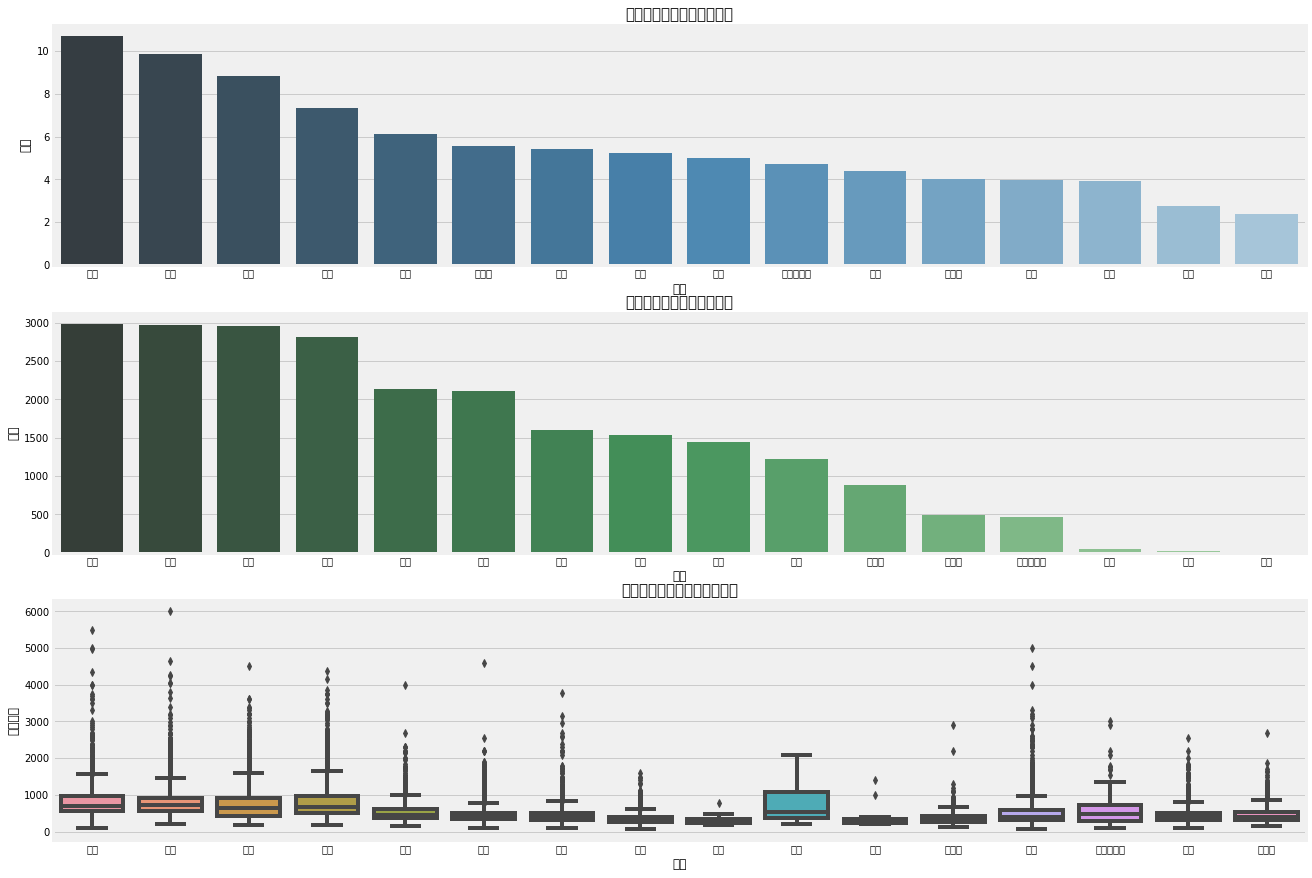

In [25]:
f, [ax1, ax2, ax3] = plt.subplots(3, 1, figsize=(20, 15))

sns.barplot(x='Region', y='PerPrice', palette='Blues_d',
            data=df_house_mean, ax=ax1)
ax1.set_title('北京各大区每平米房价对比', fontsize=15)
ax1.set_xlabel('区域')
ax1.set_ylabel('单价')

sns.barplot(x='Region', y='Price', palette='Greens_d',
            data=df_house_count, ax=ax2)
ax2.set_title('北京各大区二手房数量对比', fontsize=15)
ax2.set_xlabel('区域')
ax2.set_ylabel('数量')

sns.boxplot(x='Region', y='Price', data=df, ax=ax3)
ax3.set_title('北京各大区域二手房房屋总价', fontsize=15)
ax3.set_xlabel('区域')
ax3.set_ylabel('房屋总价')

plt.show()

## SIZE特征分析

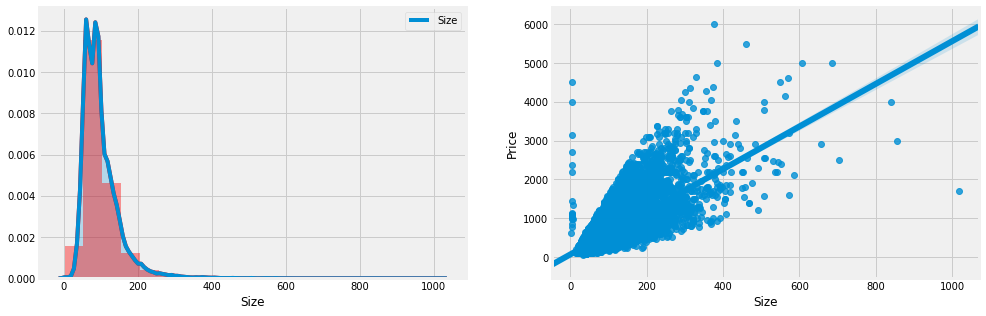

In [39]:
f, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 5))

# 建房时间分布请款
sns.distplot(df['Size'], bins=20, ax=ax1, color='r')
# distplot: 带分布形态的直方图, bins: 直方图数量
sns.kdeplot(df['Size'], shade=True, ax=ax1)
# kdeplot: 核密度估计(kernel density estimation)

# 建房时间和出售价格的关系
sns.regplot(x='Size', y='Price', data=df, ax=ax2)  # 线性回归关系

分析regplot存在异常值，即 1.面积不到10平米，价格超过了1000万 2.有一个点的面积超出了1000平米，但是价格很低。

In [41]:
# 查出异常值
df.loc[df['Size'] < 10]

,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,PerPrice,Price
1168,房山,长阳,世茂维拉,叠拼别墅,5,2015,5.0,毛坯,240.97平米,南北,216.000000,1080.0
1458,房山,长阳,世茂维拉,叠拼别墅,5,2015,5.0,毛坯,242.78平米,南北,220.000000,1100.0
1797,房山,长阳,世茂维拉,叠拼别墅,5,2015,5.0,精装,242.96平米,南北,196.000000,980.0
2268,顺义,顺义其它,龙湖好望山,叠拼别墅,4,2014,4.0,精装,295.88平米,南北,250.000000,1000.0
2274,顺义,顺义其它,鹭峯国际,叠拼别墅,4,2014,5.0,精装,295.01平米,南北,290.000000,1450.0
2276,顺义,顺义其它,龙湖好望山,叠拼别墅,3,2014,4.0,毛坯,292.31平米,南北,215.000000,860.0
2432,顺义,顺义其它,龙湖好望山,叠拼别墅,5,2013,6.0,精装,294.42平米,南北,163.333333,980.0
4078,大兴,西红门,鸿坤林语墅,叠拼别墅,3,2015,4.0,精装,427.5平米,南北,787.500000,3150.0
4079,大兴,西红门,鸿坤林语墅,叠拼别墅,4,2015,4.0,精装,361.8平米,南北,595.000000,2380.0
4761,大兴,西红门,鸿坤林语墅,叠拼别墅,3,2015,5.0,精装,386.83平米,南北,540.000000,2700.0


In [42]:
# 查出面积大于1000，但是房价很低的数据
df.loc[df['Size'] > 1000]

,Region,District,Garden,Layout,Floor,Year,Size,Elevator,Direction,Renovation,PerPrice,Price
8754,通州,通州其它,新华联科技大厦,1房间0卫,8,2009,1019.0,有电梯,南,简装,1.668302,1700.0


In [45]:
# 删除异常值
df = df[(df['Layout'] != '叠拼别墅') & (df['Size'] < 1000)]

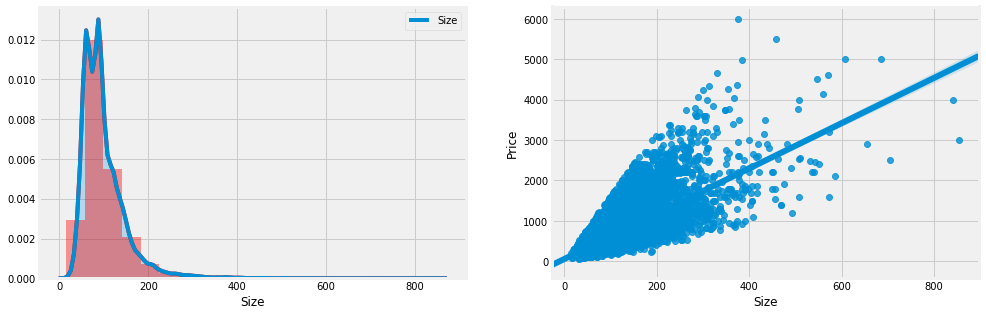

In [46]:
f, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 5))

# 建房时间分布请款
sns.distplot(df['Size'], bins=20, ax=ax1, color='r')
# distplot: 带分布形态的直方图, bins: 直方图数量
sns.kdeplot(df['Size'], shade=True, ax=ax1)
# kdeplot: 核密度估计(kernel density estimation)

# 建房时间和出售价格的关系
sns.regplot(x='Size', y='Price', data=df, ax=ax2)  # 线性回归关系

## Layout 特征分析

Text(0, 0.5, 'Layout')

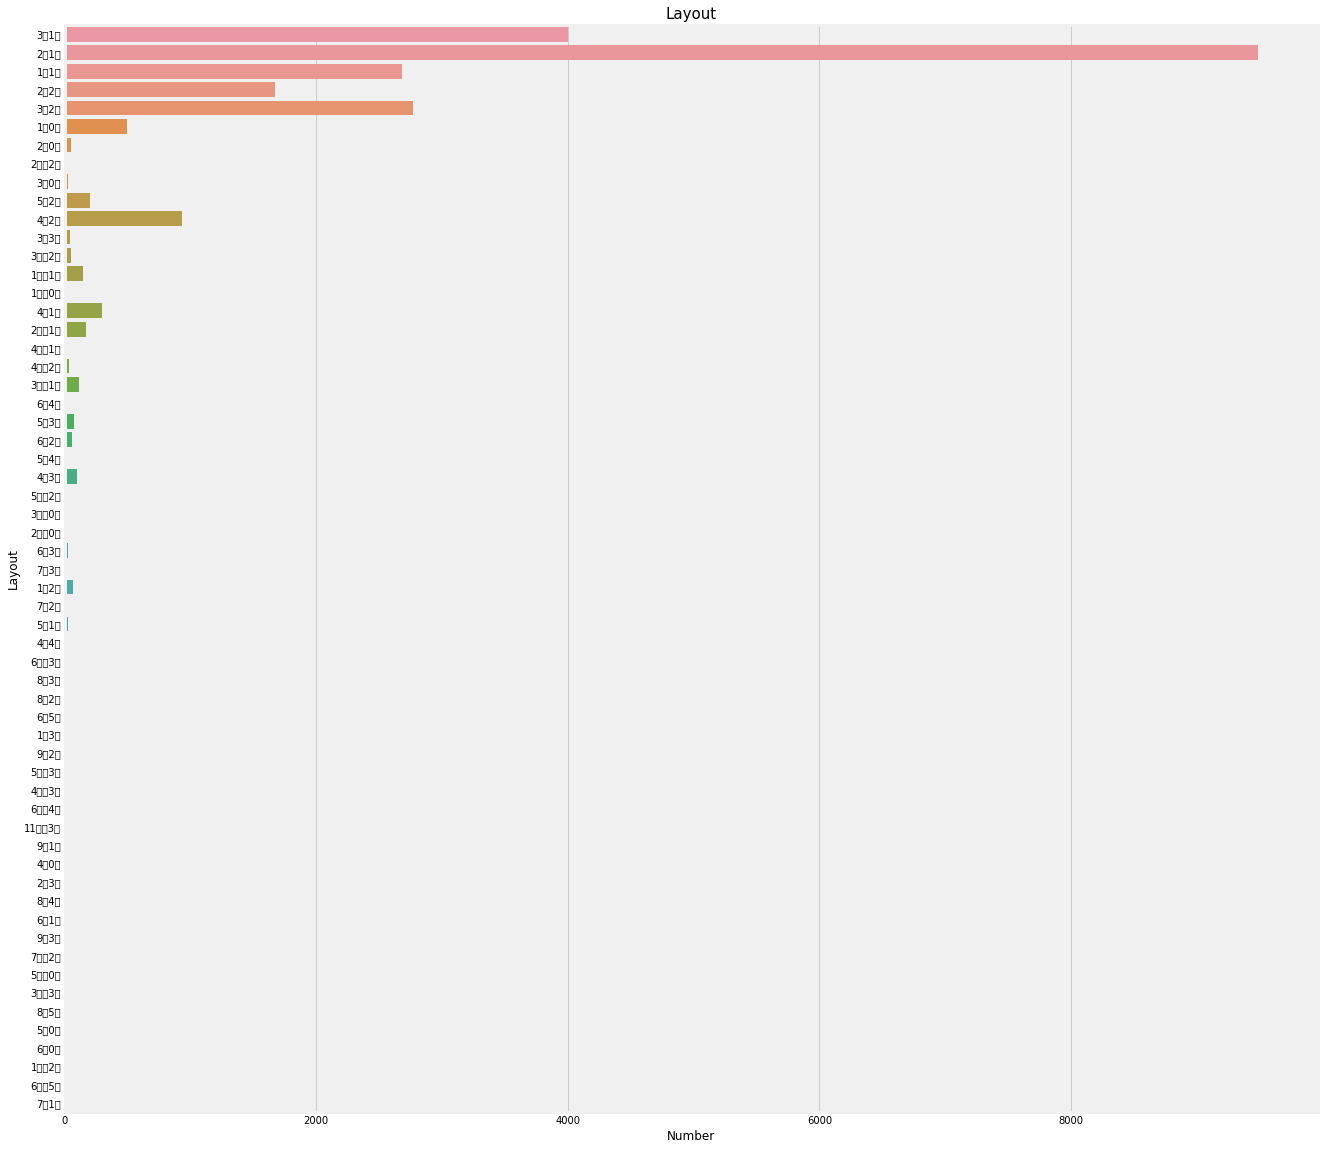

In [51]:
# 使用countplot统计并显示房屋类型数量
f, ax1 = plt.subplots(figsize=(20, 20))
sns.countplot(y='Layout', data=df, ax=ax1)
ax1.set_title('Layout', fontsize=15)
ax1.set_xlabel('Number')
ax1.set_ylabel('Layout')